# GitHub ID Sampling
### DS504 Big Data Analytics
Shile Zhao, Chen Zou, Qian Wang, Xiang Huang

## 1. some pre-defined funcs

In [1]:
import json, requests

all_tokens = [] #set tokens

def check_limit(tokens):
    res = []
    for token in tokens:
        url = "https://api.github.com/rate_limit?access_token=" + token
        try:
            res.append(json.loads(requests.get(url).content)['rate']['remaining'])
        finally:
            pass
    return res

def findMax(upper, lower=1, token=all_tokens[0]):
    def minmax(uid):
        url = "https://api.github.com/users?since=" + str(uid-1) + "&access_token=" + token + "&&per_page=100"
        l = len(json.loads(requests.get(url).content))
        return l

    if upper <= lower or minmax(upper) > 0 or minmax(lower) == 0:
        return None
    if upper - lower == 1:
        return lower
    else:
        sep = (upper + lower) / 2
        return findMax(upper, sep) or findMax(sep, lower)

In [2]:
print check_limit(all_tokens)
#'max id', findMax(20000000,17000000)

[5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]


## 2. Adjacent-query Estimator （name undetermined ）

In [3]:
import random, sys
import numpy as np
from multiprocessing import Process, Manager

def since(uid, maxid, per_page):
        token = all_tokens[0]
        url = "https://api.github.com/users?since=" + str(uid-1) + "&access_token=" + token + "&&per_page=" + str(
            per_page)
        req = requests.get(url)
        if req.status_code == 403:
            all_tokens.append(all_tokens.pop(0))
            print "current token used up, go for next"
            sys.out.flush()
            return since(uid, maxid, per_page)
        res = json.loads(req.content)
        li = [i['id'] for i in res if i['id']<=maxid]
        return li

def query(mini, maxi, queryrange, defpagesize):
    res = random.choice(range(mini, maxi+1))
    for i in xrange((queryrange-1)/defpagesize+1):
        if isinstance(res,list):
            res += since(res[-1]+1,maxi,defpagesize)
        else: res = since(res, maxi, defpagesize)
    return res

def calc_L(li, sz, nres):
    res = []
    for i in xrange(len(li)-sz):
        res.append(li[-1-i]-li[-1-i-sz])
    return np.array(res[:nres])
  
def sample(*param):
    minid, maxid, queryrange, defpagesize, stepsize, nres = param
    q = query(minid, maxid, queryrange, defpagesize)
    l = calc_L(q, stepsize, nres) # id and its length 
    return ((maxid-minid+1)/l).mean()*STEP_SIZE

def S(m, nthread, func, GT, *param):
    ## multi thread sampling ...
    #    m:       the times of running sample func
    #    nthread: number of threads
    #    func:    your sample func
    #    GT:      Groung truth
    #    param:   the parameters for sample func
    #  return: plotdata 
    manager = Manager()
    result = manager.list()
    def wrapped():
        while len(result) <= m:
            result.append(func(*param))

    q = []
    for i in xrange(nthread):
        p = Process(target=wrapped)
        p.start()
        q.append(p)

    for i in q:
        i.join()
    
    pltdata = np.array(result)
    plt.plot([pltdata[:i+1].mean() for i in xrange(len(pltdata))])
    plt.plot(np.ones(len(pltdata))*GT)
    plt.show()
    return pltdata

---
***Step 99, each time one 100-per_pagequery***(only one L)  
ID range: from 1 to 4400000 

current token used up, go for next
current token used up, go for next
current token used up, go for next
current token used up, go for next
current token used up, go for next
current token used up, go for next
current token used up, go for next
current token used up, go for next


Process Process-18:
Process Process-13:
Process Process-15:
Process Process-12:
Process Process-11:
Process Process-14:
Process Process-16:
Process Process-17:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/vincent/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/vincent/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/vincent/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/vincent/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/vincent/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/vincent/anaconda/lib/python2.7/multiprocessing/pro

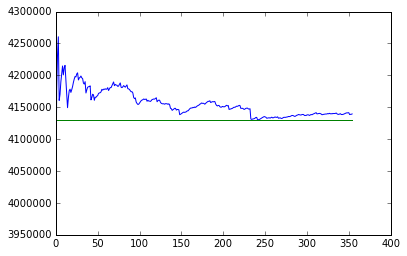

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
# TEST RANGE
MINID = 1
MAXID = 4400000 
# query parametersDEF_PAGE_SIZE= 100 # 1 ~ 100
QUERY_RANGE = 100 # like 100, 200, 300, ...
DEF_PAGE_SIZE = 100
STEP_SIZE = 49 # < QUERY_RANGE (not equal)
NO_RES = 51
# ground truth
GT= 4129983#+4260386 4283040+

result = S(1000, 8, sample, GT, MINID, MAXID, QUERY_RANGE, DEF_PAGE_SIZE, STEP_SIZE, NO_RES)

---
***Step 99, but query range 200(two 100-per_page queries, so 101 L per query)***
ID range: from 1 to 4400000 

Process Process-207:
Process Process-206:
Process Process-211:
Process Process-209:
Process Process-208:
Process Process-210:
Process Process-204:
Process Process-205:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/vincent/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/vincent/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/vincent/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/vincent/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/vincent/anaconda/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/vincent/anaconda/lib/python2.7/multiproces

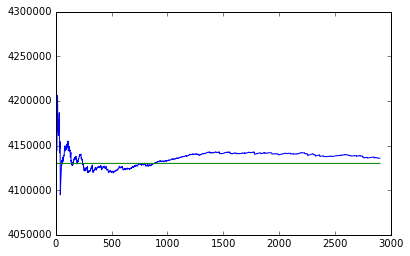

In [56]:
%matplotlib inline
from matplotlib import pyplot as plt
# TEST RANGE
MINID = 1
MAXID = 4400000 
# query parametersDEF_PAGE_SIZE= 100 # 1 ~ 100
QUERY_RANGE = 200 # like 100, 200, 300, ...
DEF_PAGE_SIZE = 100
STEP_SIZE = 99 # < QUERY_RANGE (not equal)
NO_RES = QUERY_RANGE-STEP_SIZE
# ground truth
GT= 4129983#+4260386 4283040+

result = S(5000, 8, sample, GT, MINID, MAXID, QUERY_RANGE, DEF_PAGE_SIZE, STEP_SIZE, NO_RES)

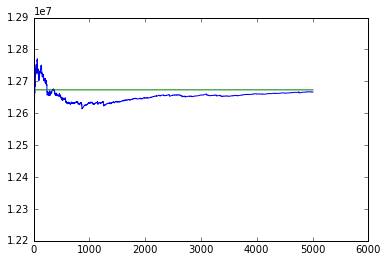

In [57]:
%matplotlib inline
from matplotlib import pyplot as plt
# TEST RANGE
MINID = 1
MAXID = 13200000 
# query parametersDEF_PAGE_SIZE= 100 # 1 ~ 100
QUERY_RANGE = 100 # like 100, 200, 300, ...
DEF_PAGE_SIZE = 100
STEP_SIZE = 99 # < QUERY_RANGE (not equal)
NO_RES = QUERY_RANGE-STEP_SIZE
# ground truth
GT= 4129983+4260386+4283040

result = S(5000, 8, sample, GT, MINID, MAXID, QUERY_RANGE, DEF_PAGE_SIZE, STEP_SIZE, NO_RES)

current token used up, go for next
current token used up, go for next
current token used up, go for next
current token used up, go for next
current token used up, go for next
current token used up, go for next
current token used up, go for next
current token used up, go for next
current token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for next







current token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for next







current token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, g

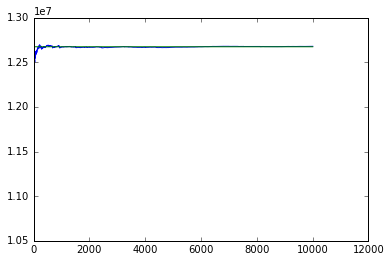









current token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for next







current token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for next







current token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for next







current token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token used up, go for nextcurrent token us

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
# TEST RANGE
MINID = 1
MAXID = 13200000 
# query parametersDEF_PAGE_SIZE= 100 # 1 ~ 100
QUERY_RANGE = 100 # like 100, 200, 300, ...
DEF_PAGE_SIZE = 100
STEP_SIZE = 99 # < QUERY_RANGE (not equal)
NO_RES = QUERY_RANGE-STEP_SIZE
# ground truth
GT= 4129983+4260386+4283040

result = S(10000, 8, sample, GT, MINID, MAXID, QUERY_RANGE, DEF_PAGE_SIZE, STEP_SIZE, NO_RES)

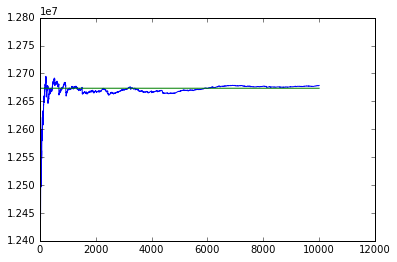

In [9]:
pltdata = np.array(result)
plt.plot([pltdata[:i+1].mean() for i in xrange(len(pltdata))])
plt.plot(np.ones(len(pltdata))*GT)
plt.ylim([12400000,12800000])
plt.show()

In [59]:
[np.array([abs(pltdata[:i].mean()/GT-1)*100 for i in xrange(10000)])[j:j+1000].max() for j in xrange(1,9002,1000)],[pltdata[:i].mean()/GT-1 for i in xrange(1000,10001,1000)]


([14.810253500064585,
  0.080548605645791582,
  0.096904114311502365,
  0.066174854035883079,
  0.078320392219355384,
  0.044827744132047709,
  0.040774707535629062,
  0.039241001037471079,
  0.030181938710516221,
  0.037531924184142085],
 [-0.00015701631660436366,
  -0.00043445812409281803,
  -0.00016720789173618744,
  -0.00041414788238902656,
  -0.00045667674735350161,
  -3.5002539569339852e-05,
  0.00033034132444442754,
  0.00027185494250203668,
  0.00019902742821598096,
  0.00037737426449346856])

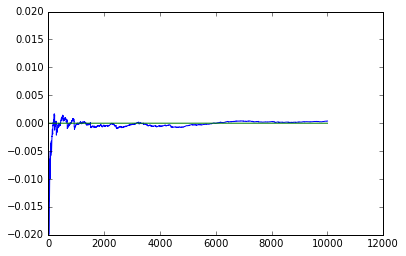

In [24]:
pltdata = np.array(result)
plt.plot([pltdata[:i+1].mean()/GT - 1 for i in xrange(len(pltdata))])
plt.plot(np.zeros(len(pltdata)))
plt.ylim([-0.02, 0.02])
plt.show()

## 3. Zoom-in (ZZPI) (unfinished)
by chen

In [ ]:
import random, json, requests

token = all_tokens[0]

def last_one(id):
    url = "https://api.github.com/users?since="+str(id)+"&access_token="+token+"&&per_page=100"
    return json.loads(requests.get(url).content)[-1][u'id']

# Since start, target inclusive
def count_valid(start, target):
    url = "https://api.github.com/users?since="+str(start)+"&access_token="+token+"&&per_page=100"
    contents = json.loads(requests.get(url).content)
    total = [i["id"] for i in contents]
    if target == total[-1]:
        return len(total)
    lo, hi = 0, len(total)-2
    while hi>=lo:
        mid = (hi+lo)/2
        if total[mid]<=target and total[mid+1]>target:
            return mid+1
        elif total[mid] < target:
            lo = mid+1
        else:
            hi = mid-1            

random.seed(233)

def divide(lo, hi):
    if last_one(lo)>=hi:
        print "Found"
        return lo,hi,count_valid(lo, hi)
    else:
        mid = (lo+hi)/2
        print mid
        if random.randint(0,1):
            return divide(mid+1, hi)
        else:
            return divide(lo, mid)

print divide(0, MAXID)

Further estimating ... And re-use results from previous query

In [7]:
result

array([ 3954209.68627451,  4399955.        ,  4339593.7254902 ,
        4348216.76470588,  3761758.82352941,  4216908.29411765,
        4306528.33333333,  4289313.96078431,  4316045.8627451 ,
        4075045.60784314,  4324735.19607843,  4255617.33333333,
        3912179.21568627,  3888813.90196078,  3851316.41176471,
        4398230.39215686,  4351665.98039216,  4220679.37254902,
        4081492.47058824,  4257673.41176471,  4280492.03921569,
        4327521.47058824,  4310606.8627451 ,  4290441.92156863,
        4179846.03921569,  4319627.66666667,  4249116.66666667,
        3890882.47058824,  4283873.03921569,  4221951.45098039,
        4264295.1372549 ,  4106539.15686275,  4160609.21568627,
        3950901.70588235,  4135573.09803922,  4323209.47058824,
        3532243.78431373,  4360289.01960784,  4334419.90196078,
        4216146.39215686,  4190201.37254902,  4232640.17647059,
        3236476.90196078,  4322567.66666667,  4399955.        ,
        4123234.70588235,  3769394.17647